In [1]:
import pandas as pd
import re

In [2]:
f = open('_chat.txt', 'r', encoding='utf-8')
data = f.read()

In [3]:
pattern = r'\[\d{2}/\d{2}/\d{2},\s*\d{1,2}:\d{2}:\d{2}\s*(?:AM|PM)?\]\s*'

In [4]:
messages = re.split(pattern,data)

In [5]:
type(messages)

list

In [6]:
dates = re.findall(pattern,data)

In [7]:
len(dates)

859

In [8]:
messages.pop()

'~\u202f917509313528: \u200eimage omitted\n'

In [9]:
df = pd.DataFrame({'user_message':messages, 'message_date':dates})

In [10]:
df

,user_message,message_date
0,,"[26/04/25, 13:30:21]"
1,Himadri Bhattacharya: https://ibmglobal.avatur...,"[26/04/25, 13:30:51]"
2,"Himadri Bhattacharya: Bhar do, turant coding e...","[26/04/25, 13:31:19]"
3,Sakshi M. Tech. (DS): Okayy\n,"[27/04/25, 20:56:09]"
4,Sakshi M. Tech. (DS): Ye kis kis ne de Diya pa...,"[27/04/25, 21:20:45]"
...,...,...
854,Pankaj Pipely: Jane ki ho gyi h\n,"[06/07/25, 16:34:14]"
855,~ 917509313528: Nii hui hai koi bhi\n,"[06/07/25, 16:34:27]"
856,Sakshi M. Tech. (DS): Jaane ki\n,"[06/07/25, 16:38:02]"
857,Himadri Bhattacharya: 1039\n,"[06/07/25, 16:38:05]"


In [11]:
# seperate users and messages
users = []
messages = []
for message in df['user_message']:
    entry = re.split('([\w\W]+?):\s',message)
    if entry[1:]:  #user name
        users.append(entry[1])
        messages.append(entry[2])
    else:
        users.append('group_notificaton')
        messages.append(entry[0])

df['user'] = users
df['message'] = messages


<>:5: SyntaxWarning: invalid escape sequence '\w'
<>:5: SyntaxWarning: invalid escape sequence '\w'
/var/folders/gm/dlyx0css1pg01nh9plvcnlmm0000gn/T/ipykernel_57351/3818633010.py:5: SyntaxWarning: invalid escape sequence '\w'
  entry = re.split('([\w\W]+?):\s',message)


In [12]:
df

,user_message,message_date,user,message
0,,"[26/04/25, 13:30:21]",group_notificaton,
1,Himadri Bhattacharya: https://ibmglobal.avatur...,"[26/04/25, 13:30:51]",Himadri Bhattacharya,https://ibmglobal.avature.net/en_US/careers/Jo...
2,"Himadri Bhattacharya: Bhar do, turant coding e...","[26/04/25, 13:31:19]",Himadri Bhattacharya,"Bhar do, turant coding exam link ayega clear k..."
3,Sakshi M. Tech. (DS): Okayy\n,"[27/04/25, 20:56:09]",Sakshi M. Tech. (DS),Okayy\n
4,Sakshi M. Tech. (DS): Ye kis kis ne de Diya pa...,"[27/04/25, 21:20:45]",Sakshi M. Tech. (DS),Ye kis kis ne de Diya paper?\n
...,...,...,...,...
854,Pankaj Pipely: Jane ki ho gyi h\n,"[06/07/25, 16:34:14]",Pankaj Pipely,Jane ki ho gyi h\n
855,~ 917509313528: Nii hui hai koi bhi\n,"[06/07/25, 16:34:27]",~ 917509313528,Nii hui hai koi bhi\n
856,Sakshi M. Tech. (DS): Jaane ki\n,"[06/07/25, 16:38:02]",Sakshi M. Tech. (DS),Jaane ki\n
857,Himadri Bhattacharya: 1039\n,"[06/07/25, 16:38:05]",Himadri Bhattacharya,1039\n


In [13]:
df.drop(columns=['user_message'], inplace=True)
df.head()

,message_date,user,message
0,"[26/04/25, 13:30:21]",group_notificaton,
1,"[26/04/25, 13:30:51]",Himadri Bhattacharya,https://ibmglobal.avature.net/en_US/careers/Jo...
2,"[26/04/25, 13:31:19]",Himadri Bhattacharya,"Bhar do, turant coding exam link ayega clear k..."
3,"[27/04/25, 20:56:09]",Sakshi M. Tech. (DS),Okayy\n
4,"[27/04/25, 21:20:45]",Sakshi M. Tech. (DS),Ye kis kis ne de Diya paper?\n


In [14]:
dates

['[26/04/25, 13:30:21] ',
 '[26/04/25, 13:30:51] ',
 '[26/04/25, 13:31:19] ',
 '[27/04/25, 20:56:09] ',
 '[27/04/25, 21:20:45] ',
 '[27/04/25, 21:21:00] ',
 '[27/04/25, 21:21:09] ',
 '[27/04/25, 21:21:25] ',
 '[27/04/25, 21:21:36] ',
 '[07/05/25, 13:07:52] ',
 '[20/05/25, 17:06:14] ',
 '[20/05/25, 17:06:19] ',
 '[20/05/25, 17:07:41] ',
 '[20/05/25, 17:07:57] ',
 '[20/05/25, 17:13:11] ',
 '[20/05/25, 17:15:20] ',
 '[20/05/25, 17:47:31] ',
 '[20/05/25, 21:07:08] ',
 '[20/05/25, 21:14:25] ',
 '[20/05/25, 21:14:37] ',
 '[20/05/25, 21:14:43] ',
 '[20/05/25, 21:19:17] ',
 '[20/05/25, 21:19:54] ',
 '[20/05/25, 21:20:13] ',
 '[20/05/25, 21:20:18] ',
 '[20/05/25, 21:20:19] ',
 '[20/05/25, 21:20:48] ',
 '[20/05/25, 21:20:52] ',
 '[20/05/25, 21:21:06] ',
 '[20/05/25, 21:21:12] ',
 '[20/05/25, 21:21:18] ',
 '[20/05/25, 21:21:30] ',
 '[20/05/25, 21:21:34] ',
 '[20/05/25, 21:21:48] ',
 '[20/05/25, 21:21:53] ',
 '[20/05/25, 21:22:02] ',
 '[20/05/25, 21:22:11] ',
 '[20/05/25, 21:42:03] ',
 '[20/05/25,

In [15]:
df['message_date'] = pd.to_datetime(df['message_date'],format='[%d/%m/%y, %H:%M:%S] ')
df.rename(columns={'message_date' : 'date'},inplace=True)

In [16]:
df.head()

,date,user,message
0,2025-04-26 13:30:21,group_notificaton,
1,2025-04-26 13:30:51,Himadri Bhattacharya,https://ibmglobal.avature.net/en_US/careers/Jo...
2,2025-04-26 13:31:19,Himadri Bhattacharya,"Bhar do, turant coding exam link ayega clear k..."
3,2025-04-27 20:56:09,Sakshi M. Tech. (DS),Okayy\n
4,2025-04-27 21:20:45,Sakshi M. Tech. (DS),Ye kis kis ne de Diya paper?\n


In [17]:
df['year'] = df['date'].dt.year

In [18]:
df.head()

,date,user,message,year
0,2025-04-26 13:30:21,group_notificaton,,2025
1,2025-04-26 13:30:51,Himadri Bhattacharya,https://ibmglobal.avature.net/en_US/careers/Jo...,2025
2,2025-04-26 13:31:19,Himadri Bhattacharya,"Bhar do, turant coding exam link ayega clear k...",2025
3,2025-04-27 20:56:09,Sakshi M. Tech. (DS),Okayy\n,2025
4,2025-04-27 21:20:45,Sakshi M. Tech. (DS),Ye kis kis ne de Diya paper?\n,2025


In [19]:
df['month'] = df['date'].dt.month_name()
df.head()

,date,user,message,year,month
0,2025-04-26 13:30:21,group_notificaton,,2025,April
1,2025-04-26 13:30:51,Himadri Bhattacharya,https://ibmglobal.avature.net/en_US/careers/Jo...,2025,April
2,2025-04-26 13:31:19,Himadri Bhattacharya,"Bhar do, turant coding exam link ayega clear k...",2025,April
3,2025-04-27 20:56:09,Sakshi M. Tech. (DS),Okayy\n,2025,April
4,2025-04-27 21:20:45,Sakshi M. Tech. (DS),Ye kis kis ne de Diya paper?\n,2025,April


In [20]:
df['day'] = df['date'].dt.day

In [21]:
df['hour'] = df['date'].dt.hour

In [22]:
df['minute'] = df['date'].dt.minute

In [23]:
df.head()

,date,user,message,year,month,day,hour,minute
0,2025-04-26 13:30:21,group_notificaton,,2025,April,26,13,30
1,2025-04-26 13:30:51,Himadri Bhattacharya,https://ibmglobal.avature.net/en_US/careers/Jo...,2025,April,26,13,30
2,2025-04-26 13:31:19,Himadri Bhattacharya,"Bhar do, turant coding exam link ayega clear k...",2025,April,26,13,31
3,2025-04-27 20:56:09,Sakshi M. Tech. (DS),Okayy\n,2025,April,27,20,56
4,2025-04-27 21:20:45,Sakshi M. Tech. (DS),Ye kis kis ne de Diya paper?\n,2025,April,27,21,20


In [24]:
df.head()

,date,user,message,year,month,day,hour,minute
0,2025-04-26 13:30:21,group_notificaton,,2025,April,26,13,30
1,2025-04-26 13:30:51,Himadri Bhattacharya,https://ibmglobal.avature.net/en_US/careers/Jo...,2025,April,26,13,30
2,2025-04-26 13:31:19,Himadri Bhattacharya,"Bhar do, turant coding exam link ayega clear k...",2025,April,26,13,31
3,2025-04-27 20:56:09,Sakshi M. Tech. (DS),Okayy\n,2025,April,27,20,56
4,2025-04-27 21:20:45,Sakshi M. Tech. (DS),Ye kis kis ne de Diya paper?\n,2025,April,27,21,20


In [25]:
df[df['user'] == 'Kunal'].shape

(81, 8)

In [26]:
words = []
for message in df['message']:
    words.extend(message.split())

In [27]:
len(words)

3446

In [28]:
!pip3 install urlextract

In [29]:
from urlextract import URLExtract

extractor = URLExtract()


In [30]:
links = []

for message in df['message']:
    links.extend(extractor.find_urls(message))
    

In [31]:
links

['https://ibmglobal.avature.net/en_US/careers/JobDetail/Application-Developer-Cloud-FullStack/9273',
 'https://bmsurl.co/BMSTNY/k4DFhe6EeB',
 'https://youtube-video-comment-sentiment-analysis-7.streamlit.app/',
 'https://www.linkedin.com/posts/digvijay98_deloitte-data-analyst-interview-experience-activity-7337709699670134784-DQCh?utm_source=social_share_send&utm_medium=android_app&rcm=ACoAAC8uEeUBWhUssI6qGuubWX3hzZ-gIeFWGK8&utm_campaign=whatsapp',
 'https://youtube.com/shorts/2zqlfa17mnU?feature=shared']

In [32]:
'<sticker omitted\n>' in df['message'].head(100)

False

In [33]:
num_media_message = df[df['message'] == 'image omitted\n'].shape[0]

In [34]:
print(num_media_message)

0


In [35]:
new_df = df[df['message']=='image ommited']

In [36]:
new_df

,date,user,message,year,month,day,hour,minute


In [37]:
x = df['user'].value_counts()

In [38]:
import matplotlib.pyplot as plt

In [39]:
name = x.index

count = x.values

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Pankaj Pipely'),
  Text(1, 0, 'Sakshi M. Tech. (DS)'),
  Text(2, 0, 'Himadri Bhattacharya'),
  Text(3, 0, '~\u202f917509313528'),
  Text(4, 0, 'Kunal'),
  Text(5, 0, 'group_notificaton')])

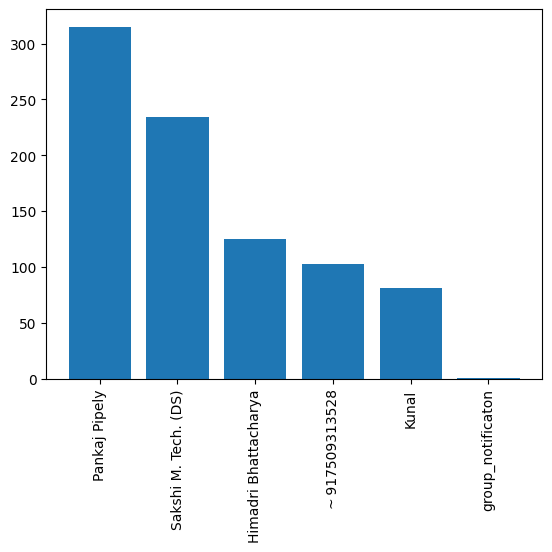

In [40]:
plt.bar(name,count)
plt.xticks(rotation='vertical')

In [41]:
round(df['user'].value_counts()/df.shape[0]*100).reset_index().rename(columns={'user':'name','count':'percent'})

,name,percent
0,Pankaj Pipely,37.0
1,Sakshi M. Tech. (DS),27.0
2,Himadri Bhattacharya,15.0
3,~ 917509313528,12.0
4,Kunal,9.0
5,group_notificaton,0.0


# remove group notification
# remove image omitted and sticker ommited 
# remove stop words

In [42]:
words = []

for message in df['message']:
    words.extend(message.split())

In [43]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,‎,360
1,omitted,359
2,‎document,167
3,‎image,144
4,message,60
5,‎This,58
6,was,51
7,deleted.,49
8,hai,42
9,to,38


In [44]:
print(df['user'].unique())

['group_notificaton' 'Himadri Bhattacharya' 'Sakshi M. Tech. (DS)'
 'Pankaj Pipely' 'Kunal' '~\u202f917509313528']


In [45]:
# remove user group notification
temp = df[df['user'] != 'group_notificaton']

In [46]:
#remove image omitted and sticker omitted
temp.iloc[100:201]

,date,user,message,year,month,day,hour,minute
101,2025-06-14 21:31:34,Sakshi M. Tech. (DS),‎sticker omitted\n,2025,June,14,21,31
102,2025-06-14 21:38:27,Kunal,Good option\n,2025,June,14,21,38
103,2025-06-15 22:24:19,Sakshi M. Tech. (DS),Okay\n,2025,June,15,22,24
104,2025-06-16 00:12:58,~ 917509313528,‎Sakshi M. Tech. (DS) added ~ 917509313528\n‎,2025,June,16,0,12
105,2025-06-16 00:13:00,Pankaj Pipely,IMG_0247.HEIC ‎document omitted\n‎,2025,June,16,0,13
...,...,...,...,...,...,...,...,...
197,2025-06-16 16:16:02,Pankaj Pipely,IMG_0385.HEIC ‎document omitted\n‎,2025,June,16,16,16
198,2025-06-16 16:16:03,Pankaj Pipely,IMG_0383.HEIC ‎document omitted\n‎,2025,June,16,16,16
199,2025-06-16 16:16:07,Pankaj Pipely,IMG_0387.HEIC ‎document omitted\n‎,2025,June,16,16,16
200,2025-06-16 16:16:09,Pankaj Pipely,IMG_0381.HEIC ‎document omitted\n‎,2025,June,16,16,16


In [47]:
temp = temp[temp['message'] != '‎sticker omitted\n']

In [48]:
pattern_to_remove = r'IMG_\d{4}\.HEIC ‎document omitted\n‎'
temp1 = temp[~temp['message'].astype(str).str.contains(pattern_to_remove, regex=True, na=False)]

In [49]:
temp.shape

(836, 8)

In [53]:
temp1.shape

(737, 8)

In [54]:
temp1[100:201]

,date,user,message,year,month,day,hour,minute
109,2025-06-16 03:12:03,Pankaj Pipely,IMG_0241.MOV ‎document omitted\n‎,2025,June,16,3,12
110,2025-06-16 03:12:28,Pankaj Pipely,IMG_0244.MOV ‎document omitted\n‎,2025,June,16,3,12
111,2025-06-16 03:12:29,Pankaj Pipely,IMG_0239.MOV ‎document omitted\n‎,2025,June,16,3,12
113,2025-06-16 03:12:36,Pankaj Pipely,IMG_0237.JPG ‎document omitted\n‎,2025,June,16,3,12
114,2025-06-16 03:13:41,Pankaj Pipely,IMG_0238.MOV ‎document omitted\n‎,2025,June,16,3,13
...,...,...,...,...,...,...,...,...
304,2025-06-24 13:30:21,Himadri Bhattacharya,time hai apne pass sab kaam nipptao\n,2025,June,24,13,30
305,2025-06-24 13:30:42,Sakshi M. Tech. (DS),Monday then??\n,2025,June,24,13,30
306,2025-06-24 13:32:01,Himadri Bhattacharya,Rishita ka confirm nahi hai\n,2025,June,24,13,32
307,2025-06-24 13:32:16,Sakshi M. Tech. (DS),@917509313528 ?\n,2025,June,24,13,32


In [ ]:
pattern2 = r'IMG_\d{4}\.MOV ‎document omitted\n‎'
temp2 = temp1[~temp1['message'].astype(str).str.contains(pattern2, regex=True, na=False)]
temp2[100:201]

,date,user,message,year,month,day,hour,minute
125,2025-06-16 03:14:01,Pankaj Pipely,IMG_0196.HEIC ‎document omitted\n,2025,June,16,3,14
126,2025-06-16 03:14:01,Himadri Bhattacharya,.\n‎,2025,June,16,3,14
177,2025-06-16 15:40:55,Pankaj Pipely,IMG_0250.HEIC ‎document omitted\n,2025,June,16,15,40
178,2025-06-16 15:45:13,Sakshi M. Tech. (DS),‎This message was deleted.\n‎,2025,June,16,15,45
180,2025-06-16 15:45:34,Sakshi M. Tech. (DS),Snapchat-2115552982.mp4 ‎document omitted\n‎,2025,June,16,15,45
...,...,...,...,...,...,...,...,...
329,2025-06-24 13:38:56,Himadri Bhattacharya,+1\n,2025,June,24,13,38
330,2025-06-24 13:39:07,Kunal,Aur aise schedule krte ki dono din ap log patn...,2025,June,24,13,39
331,2025-06-24 13:39:22,Kunal,Is week?\n,2025,June,24,13,39
332,2025-06-24 13:39:26,~ 917509313528,"Bro sat ko return ho jayenge , network issue b...",2025,June,24,13,39


In [61]:
temp2.shape

(712, 8)

In [62]:
temp2_words = []

for message in temp2['message']:
    temp2_words.extend(message.split())

pd.DataFrame(Counter(temp2_words).most_common(20))

,0,1
0,‎,236
1,omitted,213
2,‎image,144
3,message,60
4,‎This,58
5,was,51
6,deleted.,49
7,‎document,43
8,hai,42
9,to,38


In [63]:
temp3 = temp2[temp2['message'] != '‎image omitted\n‎']
temp3.shape

(584, 8)

In [64]:
temp3_words = []

for message in temp3['message']:
    temp3_words.extend(message.split())

pd.DataFrame(Counter(temp3_words).most_common(20))

,0,1
0,‎,108
1,omitted,85
2,message,60
3,‎This,58
4,was,51
5,deleted.,49
6,‎document,43
7,hai,42
8,to,38
9,hh,34


In [65]:
temp3

,date,user,message,year,month,day,hour,minute
1,2025-04-26 13:30:51,Himadri Bhattacharya,https://ibmglobal.avature.net/en_US/careers/Jo...,2025,April,26,13,30
2,2025-04-26 13:31:19,Himadri Bhattacharya,"Bhar do, turant coding exam link ayega clear k...",2025,April,26,13,31
3,2025-04-27 20:56:09,Sakshi M. Tech. (DS),Okayy\n,2025,April,27,20,56
4,2025-04-27 21:20:45,Sakshi M. Tech. (DS),Ye kis kis ne de Diya paper?\n,2025,April,27,21,20
5,2025-04-27 21:21:00,Himadri Bhattacharya,Coding dena baki hai mera\n,2025,April,27,21,21
...,...,...,...,...,...,...,...,...
854,2025-07-06 16:34:14,Pankaj Pipely,Jane ki ho gyi h\n,2025,July,6,16,34
855,2025-07-06 16:34:27,~ 917509313528,Nii hui hai koi bhi\n,2025,July,6,16,34
856,2025-07-06 16:38:02,Sakshi M. Tech. (DS),Jaane ki\n,2025,July,6,16,38
857,2025-07-06 16:38:05,Himadri Bhattacharya,1039\n,2025,July,6,16,38


In [66]:
import emoji

ModuleNotFoundError: No module named 'emoji'

In [67]:
!pip3 install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 7.4 MB/s eta 0:00:00


In [68]:
import emoji

In [78]:
import emoji.unicode_codes

# message_str = str(message)
emojis = []
for message in df['message']:
  emojis.extend([c for c in message if emoji.EMOJI_DATA])

In [79]:
print(emojis)

['h', 't', 't', 'p', 's', ':', '/', '/', 'i', 'b', 'm', 'g', 'l', 'o', 'b', 'a', 'l', '.', 'a', 'v', 'a', 't', 'u', 'r', 'e', '.', 'n', 'e', 't', '/', 'e', 'n', '_', 'U', 'S', '/', 'c', 'a', 'r', 'e', 'e', 'r', 's', '/', 'J', 'o', 'b', 'D', 'e', 't', 'a', 'i', 'l', '/', 'A', 'p', 'p', 'l', 'i', 'c', 'a', 't', 'i', 'o', 'n', '-', 'D', 'e', 'v', 'e', 'l', 'o', 'p', 'e', 'r', '-', 'C', 'l', 'o', 'u', 'd', '-', 'F', 'u', 'l', 'l', 'S', 't', 'a', 'c', 'k', '/', '9', '2', '7', '3', '\n', 'B', 'h', 'a', 'r', ' ', 'd', 'o', ',', ' ', 't', 'u', 'r', 'a', 'n', 't', ' ', 'c', 'o', 'd', 'i', 'n', 'g', ' ', 'e', 'x', 'a', 'm', ' ', 'l', 'i', 'n', 'k', ' ', 'a', 'y', 'e', 'g', 'a', ' ', 'c', 'l', 'e', 'a', 'r', ' ', 'k', 'a', 'r', 'n', 'e', ' ', 'k', 'e', ' ', 'b', 'a', 'a', 'd', ' ', 'd', 'i', 'r', 'e', 'c', 't', ' ', 'i', 'n', 't', 'e', 'r', 'v', 'i', 'e', 'w', '\n', 'O', 'k', 'a', 'y', 'y', '\n', 'Y', 'e', ' ', 'k', 'i', 's', ' ', 'k', 'i', 's', ' ', 'n', 'e', ' ', 'd', 'e', ' ', 'D', 'i', 'y', '

In [81]:
# x-axis :- years and month
# y-axis :- no of message in that particular time frame

In [82]:
df['month_num'] = df['date'].dt.month

In [84]:
timeline = df.groupby(['year','month_num','month']).count()['message'].reset_index()

In [85]:
timeline

,year,month_num,month,message
0,2025,4,April,9
1,2025,5,May,54
2,2025,6,June,564
3,2025,7,July,232


In [87]:
time = []
for i in range(timeline.shape[0]):
  time.append(timeline['month'][i] + "-" + str(timeline['year'][i]))
  

In [88]:
timeline['time'] = time

In [89]:
timeline

,year,month_num,month,message,time
0,2025,4,April,9,April-2025
1,2025,5,May,54,May-2025
2,2025,6,June,564,June-2025
3,2025,7,July,232,July-2025


([0, 1, 2, 3],
 [Text(0, 0, 'April-2025'),
  Text(1, 0, 'May-2025'),
  Text(2, 0, 'June-2025'),
  Text(3, 0, 'July-2025')])

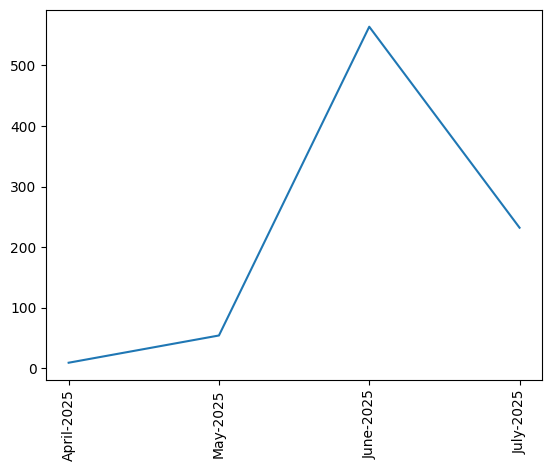

In [91]:
plt.plot(timeline['time'],timeline['message'])
plt.xticks(rotation='vertical')

# Daily TimeLine

In [92]:
df['only_date'] = df['date'].dt.date

In [94]:
daily_timeline = df.groupby('only_date').count()['message'].reset_index()

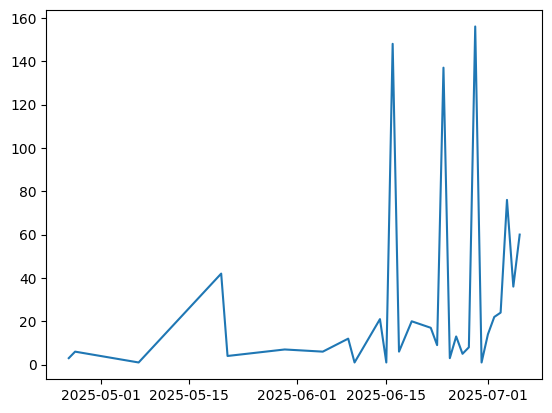

In [95]:
plt.plot(daily_timeline['only_date'],daily_timeline['message'])

# Activity Map

In [96]:
df['day_name'] = df['date'].dt.day_name()

In [97]:
df['day_name'].value_counts()

day_name
Sunday       240
Tuesday      200
Monday       170
Friday        88
Saturday      68
Thursday      63
Wednesday     30
Name: count, dtype: int64

# HeatMap for busy hour

In [104]:
period = []

for hour in df[['day_name','hour']]['hour']:
  if hour == 23 :
    period.append(str(hour) + '-' + str('00'))
  elif hour == 0:
    period.append(str('00') + '-' + str(hour+1))
  else :
    period.append(str(hour) + "-" + str(hour+1))

In [105]:
df['period'] = period

In [106]:
df.sample(5)

,date,user,message,year,month,day,hour,minute,month_num,only_date,day_name,period
745,2025-07-04 23:16:09,~ 917509313528,Kyu ?\n,2025,July,4,23,16,7,2025-07-04,Friday,23-00
210,2025-06-16 16:16:48,Pankaj Pipely,IMG_0366.HEIC ‎document omitted\n‎,2025,June,16,16,16,6,2025-06-16,Monday,16-17
632,2025-07-01 00:03:15,Pankaj Pipely,🎃\n‎,2025,July,1,0,3,7,2025-07-01,Tuesday,00-1
245,2025-06-16 16:44:45,Pankaj Pipely,IMG_0265.HEIC ‎document omitted\n‎,2025,June,16,16,44,6,2025-06-16,Monday,16-17
312,2025-06-24 13:35:18,Sakshi M. Tech. (DS),@919523685965 @916201929027 ?\n,2025,June,24,13,35,6,2025-06-24,Tuesday,13-14


In [108]:

!pip3 install seaborn


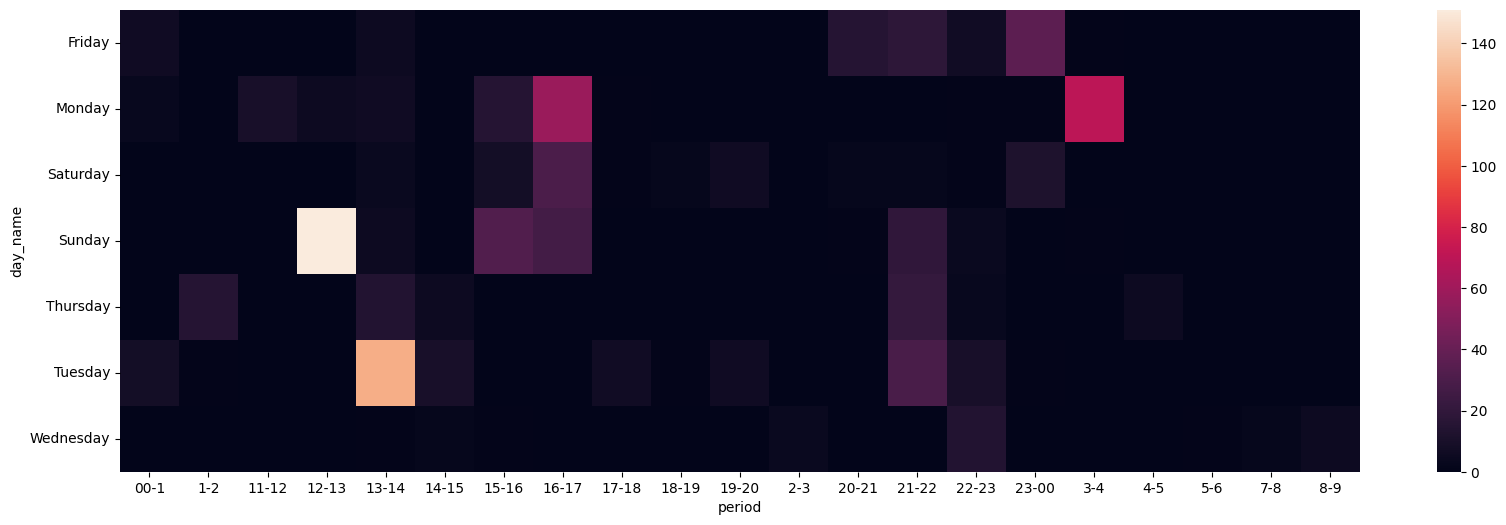

In [112]:
import seaborn as sns
plt.figure(figsize=(20,6))
sns.heatmap(df.pivot_table(index='day_name',columns='period',values='message',aggfunc='count').fillna(0))
plt.yticks(rotation = 'horizontal')
plt.show()